***The content of this file is largely from the teaching material of the Data Science unit of University of Bristol***

In [20]:
# Import tools that we will need:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [21]:
 # Set working directory
 os.chdir("/content")

#**Preliminary Cleaning**

In [22]:
# read the csv file uploaded in the woking directory "/content" in a panda data frame 
data=pd.read_csv('dataHealthAgeingOrg.csv')
data.head(2)

,Time,Time Code,Country Name,Country Code,"Age dependency ratio, old (% of working-age population) [SP.POP.DPND.OL]","Domestic general government health expenditure per capita, PPP (current international $) [SH.XPD.GHED.PP.CD]"
0,2018,YR2018,Afghanistan,AFG,4.758272778,9.64153671
1,2018,YR2018,Albania,ALB,20.04121416,376.5013733


In [23]:
# renaming the columns
data.columns = ['year','yearcode','country','countrycode','Dependency','HealthExpPC']

In [24]:
# changing the data into numeric values
data['HealthExpPC'] = pd.to_numeric(data['HealthExpPC'],errors='coerce')
data['Dependency'] = pd.to_numeric(data['Dependency'],errors='coerce')

In [25]:
# dropping columns and missing values
midData = data.drop(columns=['year','yearcode','country','countrycode'])
actData = midData.dropna()

#**Plotting Dataset and Line**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


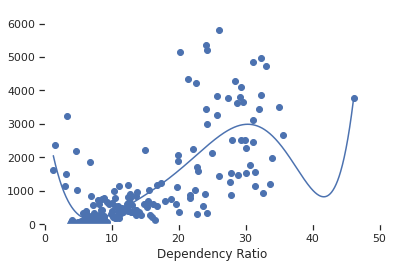

In [26]:
# put the column names as the x and y variables
y = actData['HealthExpPC']
x = actData['Dependency']

# change the order of the polynomial regression according to the best fit, in this case, order of 6
poly_model = make_pipeline(PolynomialFeatures(6),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

# name the title of the y and x axis
plt.ylabel('')
plt.xlabel('Dependency Ratio')

# set the domains for y and x
plt.xlim([0,50])
plt.ylim([0,6500])
ax = plt.subplot(111)
ax.set_facecolor('white')
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    


#**Plotting Dataset and Line without Outlier**

In [27]:
# dropping the single outlier from the dataset
midDataII = midData.drop(midData[midData.Dependency > 40].index) 

# dropping missing values
actDataII = midDataII.dropna()

In [28]:
actDataII

,Dependency,HealthExpPC
0,4.758273,9.641537
1,20.041214,376.501373
2,10.021442,633.798828
5,4.347987,69.060318
6,12.731972,780.362488
...,...,...
261,5.484690,70.541295
262,5.484060,70.442734
263,5.484690,70.541295
264,14.783966,600.435246


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


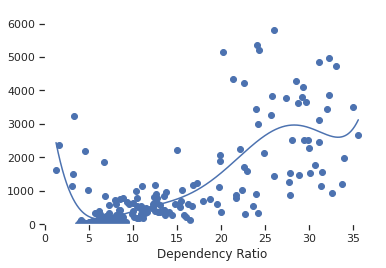

In [29]:
# plotting new dataset without the outlier
y2 = actDataII['HealthExpPC']
x2 = actDataII['Dependency']

poly_model = make_pipeline(PolynomialFeatures(6), 
                           LinearRegression())
# after polynomial features of 6, the lines are quite similar and based on vegalite the R-squared doesn't increase anymore

poly_model.fit(x2[:, np.newaxis], y2)
xfit2 = np.linspace(min(x2), max(x2), 1000)
yfit2 = poly_model.predict(xfit2[:, np.newaxis])

plt.scatter(x2, y2)
plt.plot(xfit2, yfit2);
plt.ylabel('')
plt.xlabel('Dependency Ratio')
plt.xlim([0,38])
plt.ylim([0,6500])
ax = plt.subplot(111)
ax.set_facecolor('white')
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

#**Saving CSV Files**

chart is made in vegalite

In [30]:
 #create new dataframe from the fitted line
fittedLine = pd.DataFrame(data=np.linspace(min(x2), max(x2), 1000), columns = ['xFitted'])

# add new columns for the y values of the fitted line
fittedLine['yFitted'] = yfit2 

In [31]:
fittedLine

,xFitted,yFitted
0,1.286895,2441.453320
1,1.321237,2396.667825
2,1.355579,2352.533716
3,1.389920,2309.044293
4,1.424262,2266.192903
...,...,...
995,35.457067,3051.653180
996,35.491409,3069.086627
997,35.525751,3086.952856
998,35.560093,3105.257684


In [32]:
# downloading from panda data frame to csv, for columns xFitted, yFitted
fittedLine[['xFitted','yFitted']].to_csv("dataHealthAgeingLine.csv")

In [33]:
actDataII

,Dependency,HealthExpPC
0,4.758273,9.641537
1,20.041214,376.501373
2,10.021442,633.798828
5,4.347987,69.060318
6,12.731972,780.362488
...,...,...
261,5.484690,70.541295
262,5.484060,70.442734
263,5.484690,70.541295
264,14.783966,600.435246


In [34]:
# downloading from panda data frame to csv of cleaned data 
actDataII.to_csv("dataHealthAgeing.csv")

#**Linear Regression**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


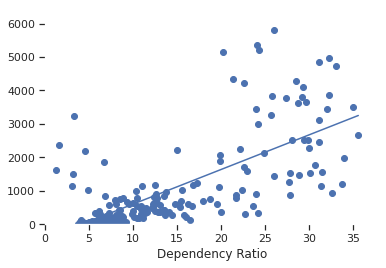

In [35]:
# plotting linear regression rather than polynomial regression, without outlier
y3 = actDataII['HealthExpPC']
x3 = actDataII['Dependency']

model = LinearRegression(fit_intercept=True)

model.fit(x3[:, np.newaxis], y3)

xfit3 = np.linspace(min(x3), max(x3), 1000)
yfit3 = model.predict(xfit3[:, np.newaxis])

plt.scatter(x3, y3)
plt.plot(xfit3, yfit3);
plt.ylabel('')
plt.xlabel('Dependency Ratio')
plt.xlim([0,38])
plt.ylim([0,6500])
ax = plt.subplot(111)
ax.set_facecolor('white')
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 

In [36]:
 #create new dataframe from the fitted line
fittedStraight = pd.DataFrame(data=np.linspace(min(x3), max(x3), 1000), columns = ['xStraight'])

# add new columns for the y values of the fitted line
fittedStraight['yStraight'] = yfit3 

In [37]:
# downloading from panda data frame to csv, for columns xFitted, yFitted
fittedStraight[['xStraight','yStraight']].to_csv("dataHealthAgeingStraight.csv")